In [2]:
import pandas as pd

fraud_test = pd.read_csv('fraudTest.csv')

In [3]:
#number of records from test set which are fraud
frauds_t= fraud_test[fraud_test['is_fraud']==1]

In [4]:
frauds_t.shape                 #This shows us that out 550k records only 2k records are fraud

(2145, 23)

In [3]:
#Lets checkout the Training Data
fraud_train = pd.read_csv('fraudTrain.csv')

In [3]:
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#Printing the number of records which are fraud
print(len(fraud_train[fraud_train['is_fraud']==1]))

7506


In [114]:
#Records from training set which are not fraud
print(len(fraud_train[fraud_train['is_fraud']==0]))

1289169


In [39]:
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [23]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
#As from above observations, we can see there are no missing data

In [38]:
fraud_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Matplotlib is building the font cache; this may take a moment.


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'cc_num'}>,
        <AxesSubplot:title={'center':'amt'}>],
       [<AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'merch_lat'}>],
       [<AxesSubplot:title={'center':'merch_long'}>,
        <AxesSubplot:title={'center':'is_fraud'}>, <AxesSubplot:>]],
      dtype=object)

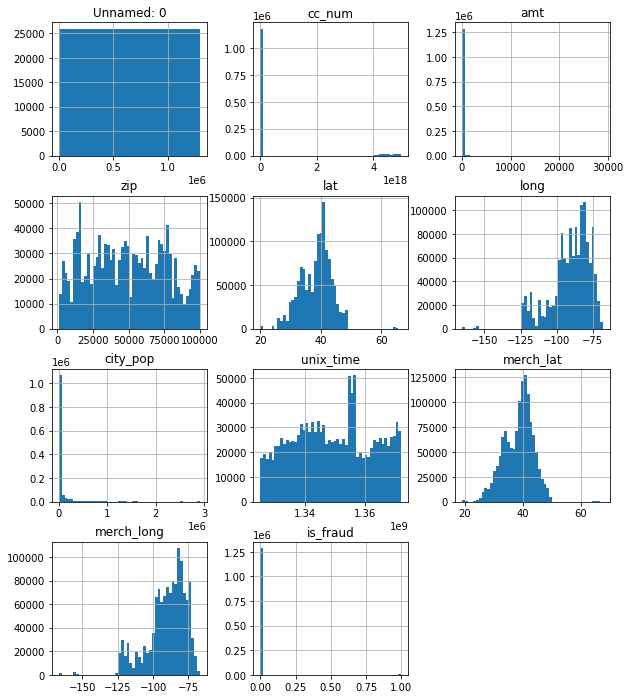

In [25]:
fraud_train.hist(bins=50, figsize=(10,12))

In [26]:
#Exploring the fraud data a little more
fraud=fraud_train[fraud_train['is_fraud']==1]

In [40]:
print(fraud.head(10))

      Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   
2523        2523   2019-01-02 03:05:23  340187018810220   
2546        2546   2019-01-02 03:38:03    4613314721966   
2553        2553   2019-01-02 03:55:47  340187018810220   
2937        2937   2019-01-02 13:38:08    4613314721966   
3527        3527   2019-01-02 23:52:08    4613314721966   
3580        3580   2019-01-03 01:05:27  340187018810220   
3600        3600   2019-01-03 01:35:52  340187018810220   
3671        3671   2019-01-03 03:17:36  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   
2523            fraud_Goodwin-Nitzsche    grocery_pos  276.31  Misty    Hart   
2546            fraud_Erdman-K

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'cc_num'}>,
        <AxesSubplot:title={'center':'amt'}>],
       [<AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'merch_lat'}>],
       [<AxesSubplot:title={'center':'merch_long'}>,
        <AxesSubplot:title={'center':'is_fraud'}>, <AxesSubplot:>]],
      dtype=object)

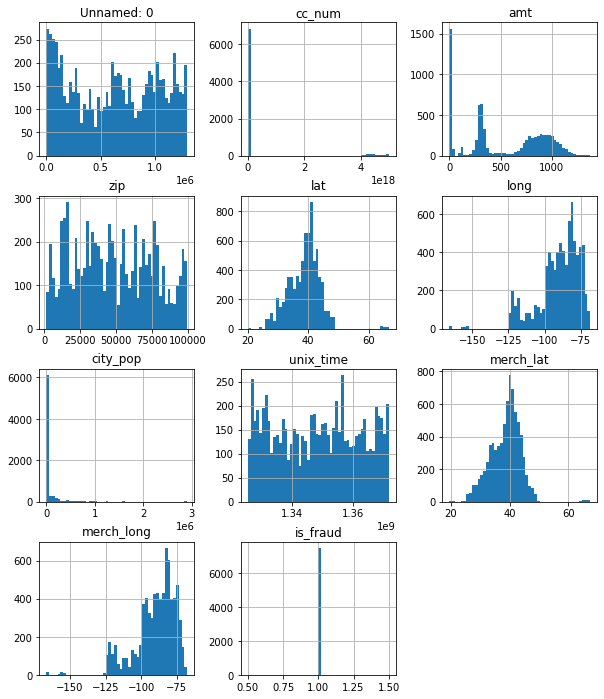

In [55]:
fraud.hist(bins=50,figsize=(10,12))

(array([3771.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3735.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

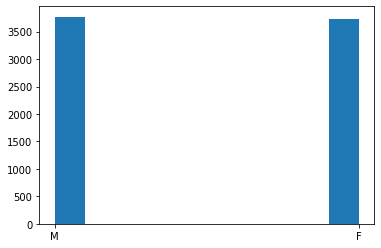

In [41]:
import matplotlib.pyplot as plt

plt.hist(fraud['gender'])

In [44]:
correlation_matrix=fraud_train.corr()

In [45]:
correlation_matrix['is_fraud'].sort_values(ascending=False)

is_fraud      1.000000
amt           0.219404
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num       -0.000981
zip          -0.002162
Unnamed: 0   -0.004767
unix_time    -0.005078
Name: is_fraud, dtype: float64

In [5]:
#Removing the label
y_train=fraud_train['is_fraud']
X_train=fraud_train.drop(['is_fraud'],axis=1)
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [6]:
X_train['category'].value_counts()                    #As there are only 14 different catagories we can apply One-Hot Encoding on it

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [7]:
fraud['category'].value_counts()

NameError: name 'fraud' is not defined

In [8]:
fraud['category'].hist(figsize=(6,6),color='orange',linewidth=1.2,edgecolor='black',bins=14)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'fraud' is not defined

In [9]:
merchant_name=X_train['merchant'].unique()            #There were around 693 merchant so we need to transform this column to numerical value

In [10]:
#merchant_name

In [6]:
from sklearn.feature_extraction import FeatureHasher

merchant_hash=FeatureHasher(n_features=10,input_type='string')
hash_function=pd.concat([X_train,pd.DataFrame(merchant_hash.fit_transform(X_train['merchant']).toarray())],axis=1)
hash_function

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,0,1,2,3,4,5,6,7,8,9
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3.0,-4.0,5.0,2.0,-4.0,1.0,-2.0,0.0,0.0,3.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,3.0,-1.0,7.0,2.0,-3.0,2.0,2.0,0.0,0.0,7.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1.0,-4.0,0.0,2.0,-1.0,2.0,0.0,-1.0,0.0,3.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,2.0,-2.0,7.0,3.0,-2.0,3.0,1.0,-1.0,-1.0,2.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0.0,-3.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,1.0,-1.0,3.0,2.0,0.0,0.0,0.0,-2.0,0.0,4.0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,3.0,-1.0,4.0,3.0,-2.0,1.0,0.0,0.0,-1.0,1.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,2.0,-2.0,2.0,2.0,-2.0,1.0,1.0,0.0,-1.0,3.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,3.0,-4.0,3.0,3.0,-5.0,3.0,0.0,0.0,-1.0,1.0


In [55]:
print(hash_function)

[[ 1.  0.  0.  0. -1.  0.  1. -1.  0.  0.]]


In [13]:
merchant_name=pd.DataFrame(merchant_name)
merchant_name=merchant_name.rename(columns={0:'merchant'})
merchant_df=pd.concat([merchant_name, pd.DataFrame(hash_function)],axis=1)
merchant_df

,merchant,0,1,2,3,4,5,6,7,8,9
0,"fraud_Rippin, Kub and Mann",3.0,-4.0,5.0,2.0,-4.0,1.0,-2.0,0.0,0.0,3.0
1,"fraud_Heller, Gutmann and Zieme",3.0,-1.0,7.0,2.0,-3.0,2.0,2.0,0.0,0.0,7.0
2,fraud_Lind-Buckridge,1.0,-4.0,0.0,2.0,-1.0,2.0,0.0,-1.0,0.0,3.0
3,"fraud_Kutch, Hermiston and Farrell",2.0,-2.0,7.0,3.0,-2.0,3.0,1.0,-1.0,-1.0,2.0
4,fraud_Keeling-Crist,0.0,-3.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
688,fraud_Jakubowski Group,2.0,-4.0,4.0,4.0,0.0,2.0,-1.0,0.0,0.0,1.0
689,fraud_Breitenberg LLC,1.0,-5.0,0.0,2.0,-1.0,3.0,0.0,0.0,0.0,3.0
690,fraud_Collier Inc,1.0,-2.0,4.0,3.0,0.0,2.0,0.0,-1.0,0.0,2.0
691,fraud_Paucek-Wiza,3.0,-3.0,2.0,2.0,-1.0,0.0,0.0,-1.0,0.0,1.0
